# Chapter 4: Machine Learning state of the art
## Figure 4.14
Intuitive explanation of *the kernel trick*.

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

# Define a nonlinear classification problem
We're gonna use the *classic* cirlces dataset.

In [165]:
from sklearn import datasets

X, y = datasets.make_circles(n_samples=500, noise=.1, factor=.2, random_state=0)

# Learn a linear classifier

In [166]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X, y)

h = 0.001
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Separating hyperplane
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Backround color
Z2 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

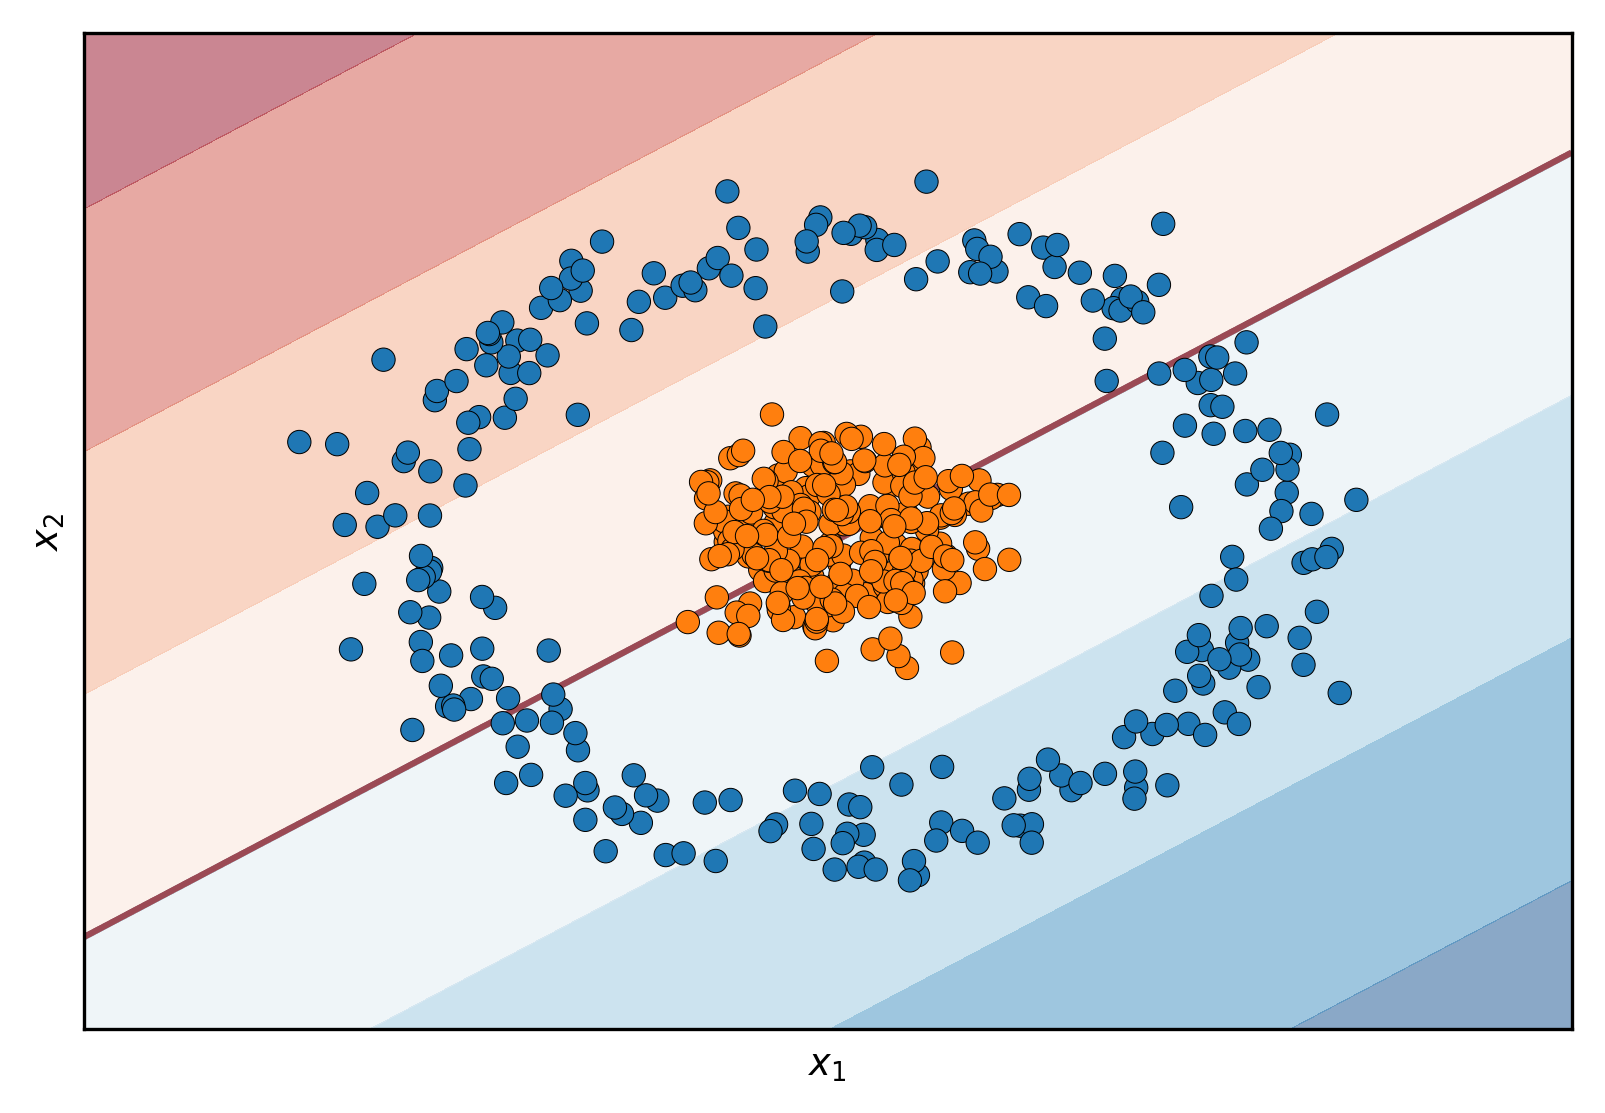

In [167]:
plt.figure(dpi=300)

cmap = {0: 'C0', 1: 'C1'}

plt.scatter(X[:,0], X[:,1], c=[cmap[_y] for _y in y], edgecolors='k', zorder=2)

plt.contour(xx, yy, Z, cmap='RdBu_r', alpha=.5, zorder=1)
plt.contourf(xx, yy, Z2, cmap='RdBu_r', alpha=.5, zorder=0)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.xticks([])
plt.yticks([])

plt.savefig('../images/kernel_trick0.png');

# The Kernel Trick

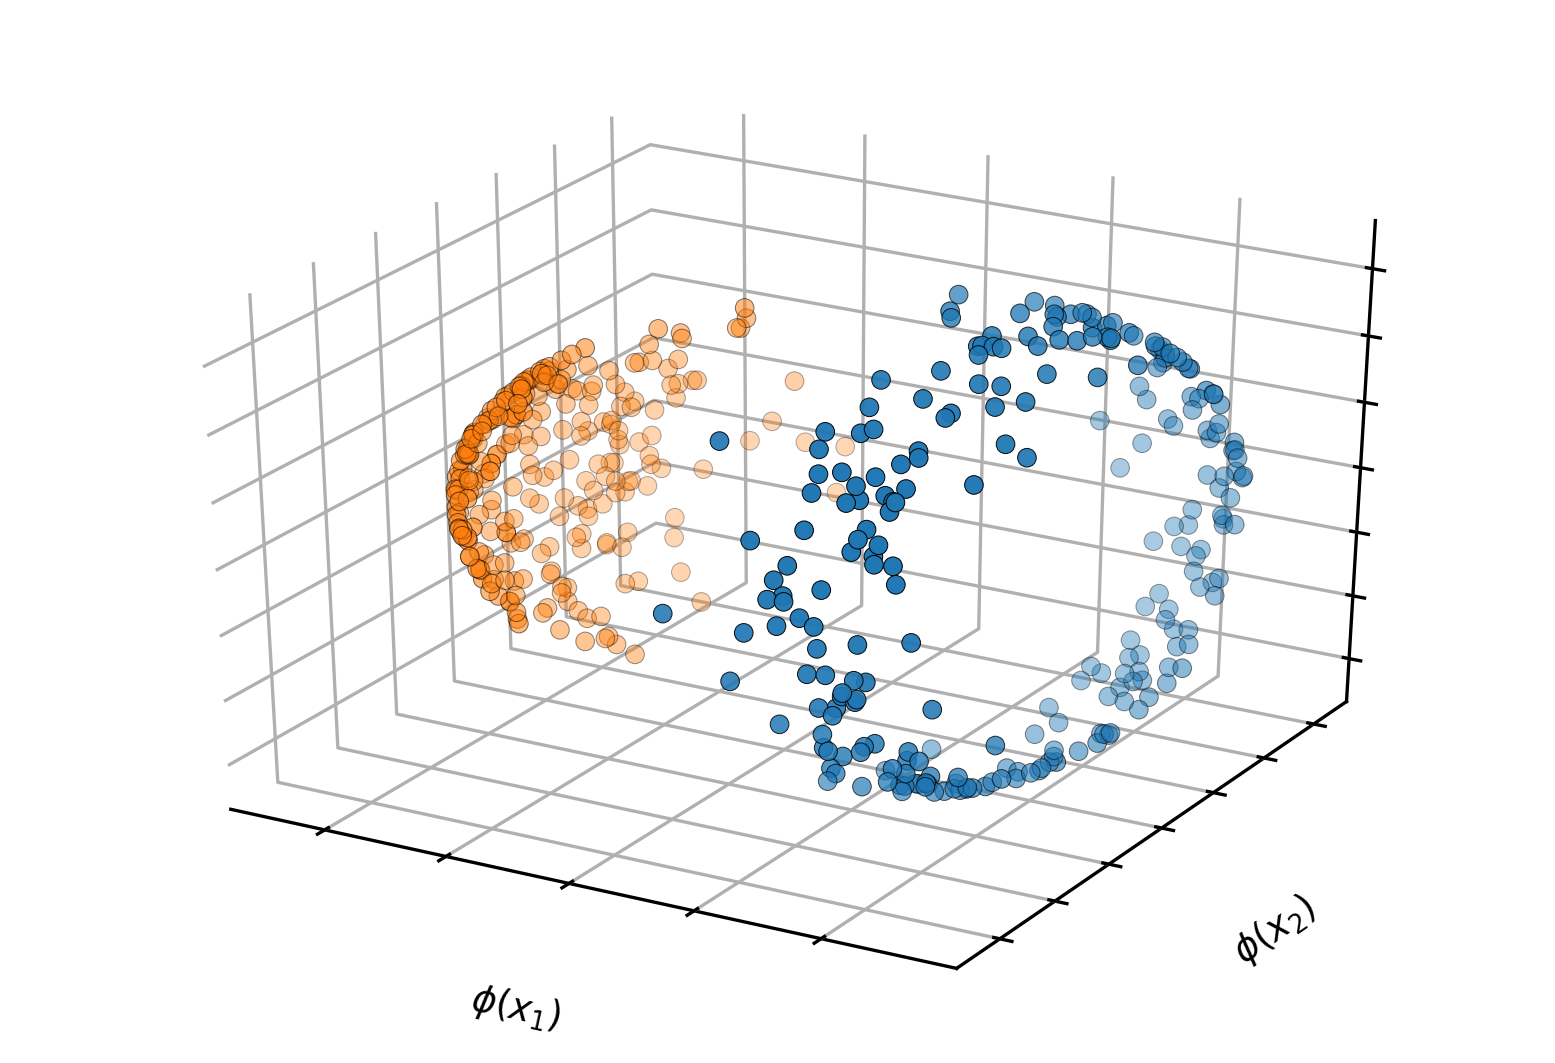

In [171]:
from sklearn.decomposition import KernelPCA

KPCA = KernelPCA(kernel='rbf', gamma=np.sqrt(2), n_components=3)

X_tr = KPCA.fit_transform(X)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=[cmap[_y] for _y in y], edgecolors='k')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_xlabel(r'$\phi(x_1)$')
ax.set_ylabel(r'$\phi(x_2)$')
#ax.set_zlabel(r'$\phi(x_3)$')

plt.savefig('../images/kernel_trick1.png');

# Classification in the feature space

In [169]:
clf.fit(X_tr[:,:2], y)

h = 0.001
x_min, x_max = X_tr[:, 0].min() - .5, X_tr[:, 0].max() + .5
y_min, y_max = X_tr[:, 1].min() - .5, X_tr[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Separating hyperplane
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Backround color
Z2 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

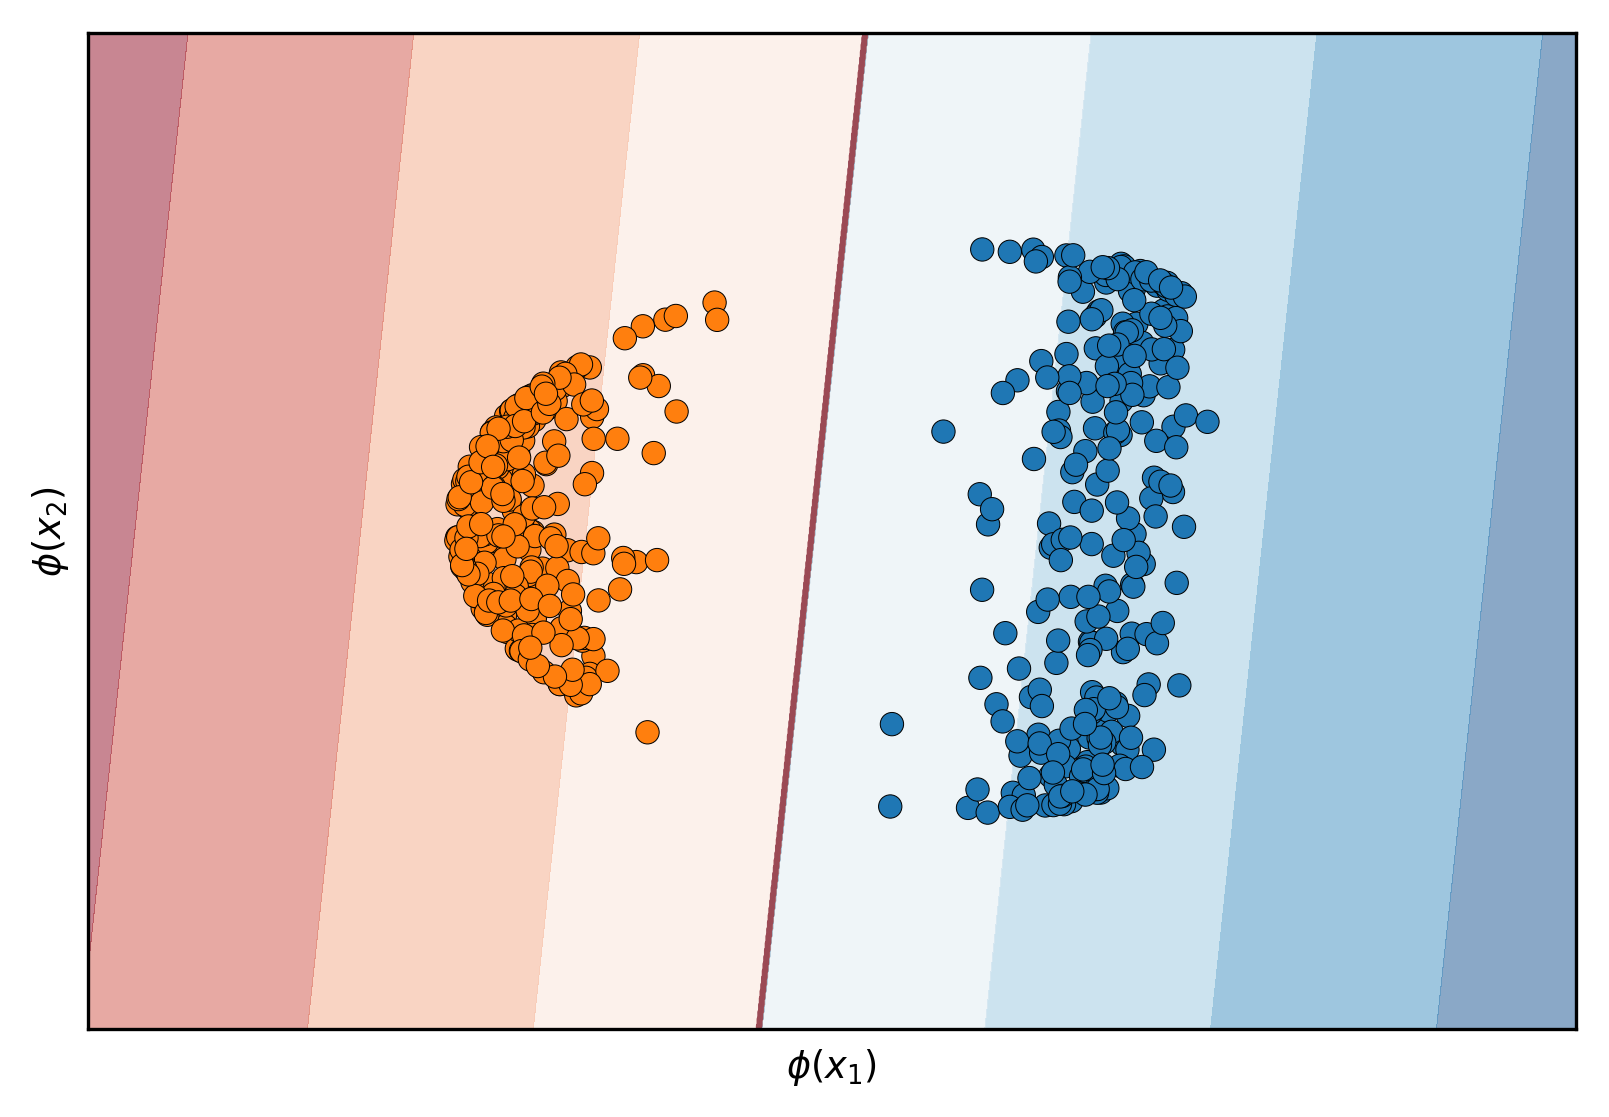

In [170]:
plt.figure(dpi=300)

plt.scatter(X_tr[:,0], X_tr[:,1], c=[cmap[_y] for _y in y], edgecolors='k', zorder=2)

plt.contour(xx, yy, Z, cmap='RdBu_r', alpha=.5, zorder=1)
plt.contourf(xx, yy, Z2, cmap='RdBu_r', alpha=.5, zorder=0)

plt.xlabel(r'$\phi(x_1)$')
plt.ylabel(r'$\phi(x_2)$')

plt.xticks([])
plt.yticks([])

plt.savefig('../images/kernel_trick2.png');